# Análisis exploratorio de datos(EDA) 

Importacion de librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import warnings
import utils
warnings.filterwarnings("ignore")

## Lectura de la hoja 'HECHOS' del dataset homicidios

In [2]:
df_homicidios_hechos = pd.read_excel('../Datasets/homicidios.xlsx', sheet_name='HECHOS')
df_homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


### Mostrar informacione acerca de la hoja 'HECHOS' del dataset 'df_homicidios'

In [3]:
df_homicidios_hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

Ver informacion acerca del DataFrame 'df_homicidios'

In [4]:
df_homicidios_hechos.shape[0]

696

Se encuentra un total de 21 columnas y 696 filas.

### Estandarizar los nombres de las columnas

In [5]:
# Se define un diccionario para el mapeo de nombres de columnas
column_map = {'N victimas': 'Cantidad víctimas',
                'Aaaa':'Año',
                'Mm':'Mes',
                'Dd':'Día',
                'Hh':'Hora entera',
                'Xy (caba)':'XY (CABA)',
                'Victima': 'Víctima'
                }
# Se realiza la capitalización, el reemplazo de guiones por espacios y el renombramiento en un solo paso
df_homicidios_hechos.columns = [column_map.get(col.replace('_', ' ').capitalize(), col.replace('_', ' ').capitalize()) for col in df_homicidios_hechos.columns]

df_homicidios_hechos.columns

Index(['Id', 'Cantidad víctimas', 'Fecha', 'Año', 'Mes', 'Día', 'Hora',
       'Hora entera', 'Lugar del hecho', 'Tipo de calle', 'Calle', 'Altura',
       'Cruce', 'Dirección normalizada', 'Comuna', 'XY (CABA)', 'Pos x',
       'Pos y', 'Participantes', 'Víctima', 'Acusado'],
      dtype='object')

## Tratamiento de datos nulos
Hay 747 valores nulos, que representane el 1.5% de todos los datos y estan ubicados en las columnas 'Altura', 'Cruce' y 'Dirección normalizada'.

En la columna 'Altura' faltan el 81.5% de los datos, debido  a que este dato se completa cuando el echo ocurre en algun punto de la calle (altura de la calle) y la mayoria de los echos registrados ocurrieron en esquinas. Por este motivo, se considera que no es un dato reelevante para el análisis y se decide eliminarlo del conjunto. Adicionalmente, este dato se encuentra en la columna 'Lugar del echo' y 'Direccion normalizada'. A continuación se muestra un ejemplo de este comportamiento, donde las dos primeras filas son esquinas y la tercera es en un punto de la cuadra.

In [6]:
df_homicidios_hechos[['Altura', 'Lugar del hecho', 'Dirección normalizada']][:3]
#df_homicidios_hechos.['Altura']

,Altura,Lugar del hecho,Dirección normalizada
0,NaN,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G..."
1,NaN,AV GRAL PAZ Y AV DE LOS CORRALES,"PAZ, GRAL. AV. y DE LOS CORRALES AV."
2,2034.0,AV ENTRE RIOS 2034,ENTRE RIOS AV. 2034


In [7]:
# Se elimina la columna
df_homicidios_hechos = df_homicidios_hechos.drop('Altura', axis=1)
df_homicidios_hechos.columns

Index(['Id', 'Cantidad víctimas', 'Fecha', 'Año', 'Mes', 'Día', 'Hora',
       'Hora entera', 'Lugar del hecho', 'Tipo de calle', 'Calle', 'Cruce',
       'Dirección normalizada', 'Comuna', 'XY (CABA)', 'Pos x', 'Pos y',
       'Participantes', 'Víctima', 'Acusado'],
      dtype='object')

En cuanto a la colomna 'Cruce' es una variable categórica, de tipo string, que contiene 317 valones distintos y donde hay un 24,6% de valores faltantes. Al contrario de la variable anterior, esta variable no tiene dato cuando se trata de un hecho ocurrido en un cruce. Esta columna puede ser interesante para evaluar si los hechos ocurren en esquinas o en algún punto de la cuadra. A continuación, se observa la columna 'Cruce' en relación a 'Lugar del hecho' y 'Tipo de calle'.

In [8]:
# Se ven los valores nulos de cruce en relación con 'Lugar del hecho' y 'Tipo de calle'
df_homicidios_hechos[df_homicidios_hechos['Cruce'].isnull()][['Cruce', 'Lugar del hecho', 'Tipo de calle']][:15]

,Cruce,Lugar del hecho,Tipo de calle
2,NaN,AV ENTRE RIOS 2034,AVENIDA
9,NaN,AV ENTRE RIOS 1366,AVENIDA
14,NaN,SUIPACHA 156,CALLE
33,NaN,LIMA 1483,CALLE
35,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA
38,NaN,AUTOPISTA LUGONES PK 10000,AUTOPISTA
42,NaN,AV LUIS MARIA CAMPOS 30,AVENIDA
43,NaN,LIMA 1471,CALLE
50,NaN,MAGARIÑOS CERVANTES 3900,CALLE
59,NaN,AV LA PLATA 2384,AVENIDA


In [9]:
# Se ven los valores NO nulos de cruce en relación con 'lugar del hecho' y 'Tipo de calle'
df_homicidios_hechos[df_homicidios_hechos['Cruce'].notnull()][['Cruce', 'Lugar del hecho', 'Tipo de calle']][:15]

,Cruce,Lugar del hecho,Tipo de calle
0,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA
1,DE LOS CORRALES AV.,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
3,"VILLEGAS, CONRADO, GRAL.",AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA
4,"SAENZ PE?A, LUIS, PRES.",AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA
5,ESCALADA AV.,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA
6,"GONZALEZ, JOAQUIN V.",NOGOYA Y JOAQUIN V. GONZALES,CALLE
7,DE LOS CORRALES AV.,AV GENERAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
8,"IRIGOYEN, BERNARDO DE",AV BELGRANO Y BERNARDO DE IRIGOYEN,AVENIDA
10,VERA,AV SCALABRINI ORTIZ Y VERA,AVENIDA
11,"QUINQUELA MARTIN, BENITO",AV REGIMIENTO DE PATRICIOS Y QUINQUELA MARTIN ...,AVENIDA


Se puede ver que los datos faltantes efectivamente son los que se refieren a un hecho en algún punto de la calle que no es una esquina o intersección de dos calles. Por lo tanto, se decide modificar esta columna en un valor 'si' para los casos que son hechos en cruces de calles y 'no' en el caso que no sea un cruce de calles.

In [10]:
# Se reemplazan los valores no nulos por "no" y los nulos por "si"
df_homicidios_hechos['Cruce'] = np.where(df_homicidios_hechos['Cruce'].notnull(), 'SI', 'NO')
# Se revia la columna
df_homicidios_hechos[['Cruce', 'Lugar del hecho', 'Tipo de calle']]

,Cruce,Lugar del hecho,Tipo de calle
0,SI,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA
1,SI,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
2,NO,AV ENTRE RIOS 2034,AVENIDA
3,SI,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA
4,SI,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA
...,...,...,...
691,SI,AV. RIESTRA Y MOM,AVENIDA
692,SI,AU DELLEPIANE Y LACARRA,AUTOPISTA
693,SI,AV. GAONA Y TERRADA,AVENIDA
694,NO,AV. EVA PERON 4071,AVENIDA


La tercer columna con valores faltantes es 'Dirección normalizada' tiene solo 8 datos nulos, lo que representa el 1.1% de los datos de la columna. Se orservan esos registros a continuación.

In [11]:
df_homicidios_hechos[df_homicidios_hechos['Dirección normalizada'].isnull()][['Dirección normalizada', 'Lugar del hecho', 'Tipo de calle']][:15]

,Dirección normalizada,Lugar del hecho,Tipo de calle
38,NaN,AUTOPISTA LUGONES PK 10000,AUTOPISTA
106,NaN,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA
119,NaN,SD,CALLE
180,NaN,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA
181,NaN,AU DELLEPIANE 2400,AUTOPISTA
313,NaN,AUTOPISTA LUGONES KM 4.7,AUTOPISTA
546,NaN,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA
621,NaN,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA


No se tiene información que permita completar con un dato concreto estos datos faltantes, pero no se considera conveniente eliminar los registros. Por lo tanto, se decide imputar a los nulos como 'SD' indicando que es Sin Dato.

In [12]:
# Se rellenan nulos con SD
df_homicidios_hechos['Dirección normalizada'].fillna("SD", inplace=True)
# Se verifican los datos imputados
df_homicidios_hechos[df_homicidios_hechos['Dirección normalizada']== 'SD'][['Dirección normalizada', 'Lugar del hecho', 'Tipo de calle']]

,Dirección normalizada,Lugar del hecho,Tipo de calle
38,SD,AUTOPISTA LUGONES PK 10000,AUTOPISTA
106,SD,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA
119,SD,SD,CALLE
180,SD,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA
181,SD,AU DELLEPIANE 2400,AUTOPISTA
313,SD,AUTOPISTA LUGONES KM 4.7,AUTOPISTA
546,SD,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA
621,SD,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA


## Datos duplicados
No se encontraron filas duplicadas en el conjunto de datos. La variable 'Id' cuenta con 696 valores únicos.

In [13]:
print(f"La columna 'Id' cuenta con {len(df_homicidios_hechos['Id'].unique())} valores únicos.")
utils.verifica_duplicados_por_columna(df_homicidios_hechos, 'Id')

La columna 'Id' cuenta con 696 valores únicos.


'No hay duplicados'

## Tipos de variables
En el reporte se pueden observar varios tipos de variables. A continuación, se muestra el tipo de dato por cada columna.

In [14]:
# Se verican las columnas por tipo de dato
utils.verificar_tipo_variable(df_homicidios_hechos)

,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Cantidad víctimas,[<class 'int'>]
2,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
3,Año,[<class 'int'>]
4,Mes,[<class 'int'>]
5,Día,[<class 'int'>]
6,Hora,"[<class 'datetime.time'>, <class 'str'>, <clas..."
7,Hora entera,"[<class 'int'>, <class 'str'>]"
8,Lugar del hecho,[<class 'str'>]
9,Tipo de calle,[<class 'str'>]


Las columnas 'Hora', 'Hora entera' y 'Calle' presentan varios tipos de datos en la misma columna, por lo que se deben revisar cada uno y asignar un único tipo de dato.

Se observa en primer lugar la columna 'Hora'.

In [15]:
# Cantidad de valores por tipo de dato en la columna 'hora'
df_homicidios_hechos['Hora'].apply(type).value_counts()

Hora
<class 'datetime.time'>        608
<class 'str'>                   85
<class 'datetime.datetime'>      3
Name: count, dtype: int64

Dado que la mayoría de los datos son del tipo datetime.time, se decide convertir todos a este tipo de dato.

In [16]:
# Se cambia el tipo de dato
df_homicidios_hechos['Hora'] = df_homicidios_hechos['Hora'].apply(lambda x: utils.convertir_a_time(x))
# Se verifica la cantidad de valores por tipo de dato en la columna 'hora'
print('Tipos de datos:')
print(df_homicidios_hechos['Hora'].apply(type).value_counts())
print('Registro con NoneType:')
df_homicidios_hechos[df_homicidios_hechos['Hora'].isna()]

Tipos de datos:
Hora
<class 'datetime.time'>    695
<class 'NoneType'>           1
Name: count, dtype: int64
Registro con NoneType:


,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
518,2019-0103,1,2019-12-18,2019,12,18,None,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


Se puede ver que falta el dato de la hora tanto en las columnas 'Hora' como 'Hora entera'. Para imputar un valor se decide

In [17]:
# calcula la hora mas común
hora_moda = df_homicidios_hechos['Hora'].mode().iloc[0]
print(f'La hora mas común es: {hora_moda}')
# Se reemplaza el valor None por la hora más común
df_homicidios_hechos['Hora'].fillna(hora_moda, inplace=True)
# se verifica el tipo de dato para la columna
df_homicidios_hechos['Hora'].apply(type).value_counts()

La hora mas común es: 09:00:00


Hora
<class 'datetime.time'>    696
Name: count, dtype: int64

Ahora, como ya se vio, la columna 'Hora entera' presenta dos tipos de datos porque aparece 'SD' en el mismo hecho analizado anteriormente. Por lo tanto, se imputa la hora calculada mas común a este dato faltante.

In [18]:
# Se verifica el tipo de dato
df_homicidios_hechos['Hora entera'].apply(type).value_counts()

Hora entera
<class 'int'>    695
<class 'str'>      1
Name: count, dtype: int64

In [19]:
# Se imputa la hora moda al dato faltante
df_homicidios_hechos['Hora entera'] = df_homicidios_hechos['Hora entera'].apply(lambda x: int(hora_moda.hour) if x == "SD" else x)
# Se verifica el tipo de dato
df_homicidios_hechos['Hora entera'].apply(type).value_counts()

Hora entera
<class 'int'>    696
Name: count, dtype: int64

In [20]:
# Se verifica el registro completado
df_homicidios_hechos[df_homicidios_hechos['Id']=='2019-0103']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
518,2019-0103,1,2019-12-18,2019,12,18,09:00:00,9,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


Finalmente, la columna 'Calle' presenta dos tipos de datos. Por la información de la variable, es una columna de strings pero se presentan algunos float. Se revisan los registros con este último tipo de dato.

In [21]:
# Se verifica el tipo de dato
print('Tipos de datos:')
print(df_homicidios_hechos['Hora entera'].apply(type).value_counts())
# Se observa el registro con tipo de dato float
print('Registro con tipo float:')
df_homicidios_hechos[df_homicidios_hechos['Calle'].apply(lambda x: isinstance(x, float))]

Tipos de datos:
Hora entera
<class 'int'>    696
Name: count, dtype: int64
Registro con tipo float:


,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,NO,SD,0,Point (. .),.,.,PEATON-SD,PEATON,SD


Se observa que no se cuenta con el dato de la calle donde ocurrió el hecho. Por lo tanto, se decide imputar 'SD' a este valor faltante.

In [22]:
# Se imputa SD al dato faltante
df_homicidios_hechos['Calle'].fillna('SD', inplace=True)
# Se verifica el registro completado
df_homicidios_hechos[df_homicidios_hechos['Id']=='2016-0151']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,SD,NO,SD,0,Point (. .),.,.,PEATON-SD,PEATON,SD


Se verifica una vez mas los tipo de datos para todas las variables.

In [23]:
# Se verican las columnas por tipo de dato
utils.verificar_tipo_variable(df_homicidios_hechos)

,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Cantidad víctimas,[<class 'int'>]
2,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
3,Año,[<class 'int'>]
4,Mes,[<class 'int'>]
5,Día,[<class 'int'>]
6,Hora,[<class 'datetime.time'>]
7,Hora entera,[<class 'int'>]
8,Lugar del hecho,[<class 'str'>]
9,Tipo de calle,[<class 'str'>]


## Categorías Victima y Acusado
En este punto se revisan si las categorías informadas por el diccionario de datos es la correcta.

In [24]:

df_homicidios_hechos['Víctima'].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

In [25]:
df_homicidios_hechos['Acusado'].unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

Para 'Acusado' no se observan características distintas a las esperadas. En cambio, para las categorías de 'Víctima' se observan dos categorías Objeto fijo y Peatón moto que no están en el diccionario de datos. Se observan estos registros para corregirlos.

In [26]:
df_homicidios_hechos[df_homicidios_hechos['Víctima'].isin(['OBJETO FIJO', 'PEATON_MOTO'])]

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
230,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OBJETO FIJO,AUTO
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,SI,NUEVA YORK y ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO


Se observan dos registros, uno por cada término distinto al del diccionario de datos. Se decide cambiarlo por OTRO dado que no hay otro dato que pueda indicar el vehículo de la victima.

In [27]:
# Se cambia por OTRO
df_homicidios_hechos['Víctima'] = df_homicidios_hechos['Víctima'].replace({'OBJETO FIJO':'OTRO', 'PEATON_MOTO':'OTRO'})
# Se verifican esos cambios
df_homicidios_hechos[df_homicidios_hechos['Id'].isin(['2017-0108', '2020-0063'])]

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
230,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OTRO,AUTO
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,SI,NUEVA YORK y ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO-MOTO,OTRO,MOTO


## Variables geográfica
Durante el análisis anterior, se pudo ver que hay faltantes de información geográfica en las columnas 'XY_(CABA)', 'Pos_x' y 'Pos_y'. Se observan esos registros.

In [28]:
df_homicidios_hechos[df_homicidios_hechos['XY (CABA)']=='Point (. .)']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NO,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NO,SD,13,Point (. .),.,.,MOTO-SD,MOTO,SD
71,2016-0096,1,2016-07-25,2016,7,25,07:00:00,7,"AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3",AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NO,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,Point (. .),-58.47433193007387,-34.66684950051973,MOTO-CARGAS,MOTO,CARGAS
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NO,SD,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,SD,NO,SD,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,NO,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,"LUGONES, LEOPOLDO AV.",NO,"LUGONES, LEOPOLDO AV.",14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,NO,SD,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NO,SD,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NO,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS


Son 14 registros que no presentan las coordenadas planas del hecho y también se ven 10 registros que tampoco presentan los datos 'Pos x' y 'Pos y'. Se buscó información que permitiera completar estos datos, pero al momento de cierre del presente informe aún no se encontró. Para continuar con el análsis se imputarán 0 de modo tal que sirva para excluir el valor en el dashboard a realizar.

In [29]:
# Se reemplazan los valores faltantes por 0
df_homicidios_hechos['Pos x'] = df_homicidios_hechos['Pos x'].replace('.', 0)
df_homicidios_hechos['Pos y'] = df_homicidios_hechos['Pos y'].replace('.', 0)
df_homicidios_hechos['XY (CABA)'] = df_homicidios_hechos['XY (CABA)'].replace('Point (. .)', 0)

Se verifica uno de los registros que se rellenaron.

In [30]:
df_homicidios_hechos[df_homicidios_hechos['Id']=='2016-0052']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NO,SD,13,0,0,0,MOTO-SD,MOTO,SD


## Lectura de la hoja 'VICTIMAS' del dataset homicidios 
Se extraen los datos de la pestaña VICTIMAS del excel homicidios y se observan las primeras filas.

In [31]:
df_homicidios_victimas = pd.read_excel('../Datasets/homicidios.xlsx', sheet_name='VICTIMAS')
df_homicidios_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


## Datos generales
El conjunto de datos presenta 10 variables (columnas) y 717 registros lo que se pueden ver a continuación.

In [32]:
# Se observan las columnas de dataset
df_homicidios_victimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [33]:
# Cantidad de registros
df_homicidios_victimas.shape[0]

717

Dado que algunas estan en minúsculas y otras en mayúscula, se decide estanadarizar los nombres de la siguiente forma.

In [34]:
# Se coloca la primera en mayúscula
df_homicidios_victimas.columns = [x.capitalize() for x in df_homicidios_victimas.columns]
# Se reemplazan los guiones por espacios
df_homicidios_victimas.columns = df_homicidios_victimas.columns.str.replace('_', ' ')
# Se renombran algunas columnas
df_homicidios_victimas = df_homicidios_victimas.rename(columns={'Id hecho': 'Id',
                                                      'Aaaa':'Año',
                                                      'Mm':'Mes',
                                                      'Dd':'Día',
                                                      'Victima':'Víctima'})
df_homicidios_victimas.columns

Index(['Id', 'Fecha', 'Año', 'Mes', 'Día', 'Rol', 'Víctima', 'Sexo', 'Edad',
       'Fecha fallecimiento'],
      dtype='object')

## Datos nulos
Desde el reporte se informa que no se encuentran valores nulos. A continuación, se verifica esto.

In [35]:
# Verifica si hay valores nulos en homicidios_victimas
df_homicidios_victimas.isna().any().any()

False

## Datos duplicados
Se verifican si hay duplicados.

In [36]:
# Se buscan las filas repetidas
df_homicidios_victimas[df_homicidios_victimas.duplicated()]

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento


No hay filas duplicadas. Se verifica si el id es único o no.

In [37]:
utils.verifica_duplicados_por_columna(df_homicidios_victimas, 'Id')

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
29,2016-0041,2016-03-29,2016,3,29,CONDUCTOR,MOTO,MASCULINO,54,2016-03-29 00:00:00
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
98,2016-0126,2016-09-18,2016,9,18,CONDUCTOR,AUTO,MASCULINO,37,SD
99,2016-0126,2016-09-18,2016,9,18,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60,SD
163,2017-0026,2017-02-26,2017,2,26,PASAJERO_ACOMPAÑANTE,AUTO,FEMENINO,23,2017-02-26 00:00:00
164,2017-0026,2017-02-26,2017,2,26,CONDUCTOR,AUTO,MASCULINO,19,2017-02-26 00:00:00
173,2017-0035,2017-03-23,2017,3,23,CONDUCTOR,AUTO,MASCULINO,28,2017-03-23 00:00:00
174,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32,2017-03-23 00:00:00
175,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30,2017-03-23 00:00:00
177,2017-0036,2017-03-29,2017,3,29,CONDUCTOR,MOTO,MASCULINO,20,2017-03-29 00:00:00


Se observan 'id' repetidos, pero se puede analizar que se refieren al mismo hecho con varias victimas distintas. Por tal motivo, se conservan las mismas.

## Tipos de variables
En el reporte se pueden observar varios tipos de variables. A continuación, se muestra el tipo de dato por cada columna.

In [38]:
# Se verican las columnas por tipo de dato
utils.verificar_tipo_variable(df_homicidios_victimas)

,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
2,Año,[<class 'int'>]
3,Mes,[<class 'int'>]
4,Día,[<class 'int'>]
5,Rol,[<class 'str'>]
6,Víctima,[<class 'str'>]
7,Sexo,[<class 'str'>]
8,Edad,"[<class 'int'>, <class 'str'>]"
9,Fecha fallecimiento,"[<class 'datetime.datetime'>, <class 'str'>]"


Las columnas 'Edad' y 'Fecha fallecimiento' presentan varios tipos de datos en la misma columna, por lo que se deben revisar cada uno y asignar un único tipo de dato.

Se observa en primer lugar la columna 'Edad'.

In [39]:
# Cantidad de valores por tipo de dato en la columna 'edad'
tipos_datos = df_homicidios_victimas['Edad'].apply(type).value_counts()
print('Los tipos de datos son:')
print(tipos_datos)
print(f'Los datos {tipos_datos.index[1]} representan el {round((tipos_datos[1]/tipos_datos.sum()),2)}')

Los tipos de datos son:
Edad
<class 'int'>    664
<class 'str'>     53
Name: count, dtype: int64
Los datos <class 'str'> representan el 0.07


Se observan 53 registros con datos del tipo string que reresentan el 7% del los registros de la columna. A contiuación, se revisan los mismos.

In [40]:
df_homicidios_victimas[df_homicidios_victimas['Edad'].apply(lambda x: isinstance(x, str))]

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,SD,SD
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,SD,SD
36,2016-0049,2016-04-17,2016,4,17,SD,SD,SD,SD,SD
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,SD,SD,SD
55,2016-0077,2016-06-13,2016,6,13,PEATON,PEATON,FEMENINO,SD,SD
63,2016-0085,2016-06-29,2016,6,29,SD,MOTO,MASCULINO,SD,SD
72,2016-0096,2016-07-25,2016,7,25,CONDUCTOR,MOTO,MASCULINO,SD,SD
89,2016-0115,2016-09-02,2016,9,2,SD,SD,MASCULINO,SD,SD
93,2016-0119,2016-09-04,2016,9,4,PASAJERO_ACOMPAÑANTE,SD,FEMENINO,SD,SD


Para poder rellenar esos datos faltantes, se quiere imputar los mismos con el promedio de las edades de las victimas, pero teniendo en cuenta el 'Sexo'. Como se observa que esa variable también presenta faltantes de datos, primero se completan esos valores, teniendo en cuenta el valor mas frecuente entre las víctimas.

In [41]:
# Imputa valor mas frecuente en la columna sexo
utils.imputa_valor_frecuente(df_homicidios_victimas, 'Sexo')

El valor mas frecuente es: MASCULINO


Ahora se puede imputar la edad, teniendo en cuenta el sexo.

In [42]:
utils.imputa_edad_media_segun_sexo(df_homicidios_victimas)

La edad promedio de Femenino es 51 y de Masculino es 40


Se revisan algunos ejemplos rellenados.

In [43]:
id_hecho_ejemplos = ['2016-0045', '2016-0048', '2016-0049']
df_homicidios_victimas[df_homicidios_victimas['Id'].isin(id_hecho_ejemplos)]

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,39,SD
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,50,SD
36,2016-0049,2016-04-17,2016,4,17,SD,SD,MASCULINO,39,SD


En ese ejemplo se observa que 'Rol' y 'Victima' también tiene faltantes de datos. Se revisan la cantidad de SD que hay en cada una.

In [44]:
print(f"La cantidad de SD en 'rol' es de {len(df_homicidios_victimas[df_homicidios_victimas['Rol']=='SD'])}")
print(f"La cantidad de SD en 'victima' es de {len(df_homicidios_victimas[df_homicidios_victimas['Víctima']=='SD'])}")

La cantidad de SD en 'rol' es de 11
La cantidad de SD en 'victima' es de 9


Al comprobarse que son pocos los datos donde falta la información, se decide imputar el valor mas frecuente para cada columna.

In [45]:
# Imputa valor mas frecuente en la columna rol
utils.imputa_valor_frecuente(df_homicidios_victimas, 'Rol')

El valor mas frecuente es: CONDUCTOR


In [46]:
# Imputa valor mas frecuente en la columna victima
utils.imputa_valor_frecuente(df_homicidios_victimas, 'Víctima')

El valor mas frecuente es: MOTO


Se revisan los mismos ejemplos anteriores, para ver estas últimas imputaciones.

In [47]:

id_hecho_ejemplos = ['2016-0045', '2016-0048', '2016-0049']
df_homicidios_victimas[df_homicidios_victimas['Id'].isin(id_hecho_ejemplos)]

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,39,SD
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,50,SD
36,2016-0049,2016-04-17,2016,4,17,CONDUCTOR,MOTO,MASCULINO,39,SD


Finalmente, queda la columna 'Fecha fallecimiento' que presenta dos tipo de datos y por lo que se observa de los ejemplos anteriores, se refiere a faltantes de datos. Como el objetivo es analizar los datos para encontrar patrones que permitan tomar decisiones para disminuir los accidentes fatales, conocer la fecha de fallecimiento no aporta información al análsis, por lo que se decide borrar la columna.

In [48]:

df_homicidios_victimas = df_homicidios_victimas.drop('Fecha fallecimiento', axis=1)
df_homicidios_victimas.head(3)

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30


Se verifica una vez mas el tipo de datos completo del conjunto de datos.

In [49]:
# Se verican las columnas por tipo de dato
utils.verificar_tipo_variable(df_homicidios_victimas)

,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
2,Año,[<class 'int'>]
3,Mes,[<class 'int'>]
4,Día,[<class 'int'>]
5,Rol,[<class 'str'>]
6,Víctima,[<class 'str'>]
7,Sexo,[<class 'str'>]
8,Edad,[<class 'int'>]


## Eliminación de columnas
Dado que este conjunto de datos se unirá con el homicidios_hechos, se pueden eliminar las columnas 'Fecha', 'Año', 'Mes', 'Día' y 'Víctima', porque es la misma información que contiene homicidios_hechos. Se verifica un ejemplo.

In [50]:
df_homicidios_hechos[df_homicidios_hechos['Id']=='2016-0001']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO


In [51]:
df_homicidios_victimas[df_homicidios_victimas['Id']=='2016-0001']

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19


In [52]:
# Se eliminan las columnas repetidas
df_homicidios_victimas = df_homicidios_victimas.drop(['Fecha', 'Año', 'Mes', 'Día', 'Víctima'], axis=1)
df_homicidios_victimas.columns

Index(['Id', 'Rol', 'Sexo', 'Edad'], dtype='object')

## Unificación de la información
Se unifican en un único dataframe los dos conjuntos de datos ingestados anteriormente.

In [53]:
df_homicidios = df_homicidios_victimas.merge(df_homicidios_hechos, on='Id', how='left')
df_homicidios

,Id,Rol,Sexo,Edad,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,...,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,04:00:00,...,PIEDRA BUENA AV.,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,01:15:00,...,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,07:00:00,...,ENTRE RIOS AV.,NO,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,00:00:00,...,LARRAZABAL AV.,SI,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,05:20:00,...,SAN JUAN AV.,SI,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50,1,2021-12-12,2021,12,12,06:20:00,...,RIVADAVIA AV.,SI,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,1,2021-12-13,2021,12,13,17:10:00,...,RIESTRA AV.,SI,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,1,2021-12-20,2021,12,20,01:10:00,...,"DELLEPIANE, LUIS, TTE. GRAL.",SI,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
715,2021-0095,CONDUCTOR,MASCULINO,27,1,2021-12-30,2021,12,30,00:43:00,...,GAONA AV.,SI,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS


Se verifican los tipos de datos y cantidad de nulos en este nuevo dataframe.

In [54]:
utils.verificar_tipo_datos_y_nulos(df_homicidios)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,Id,[<class 'str'>],100.0,0.0,0
1,Rol,[<class 'str'>],100.0,0.0,0
2,Sexo,[<class 'str'>],100.0,0.0,0
3,Edad,[<class 'int'>],100.0,0.0,0
4,Cantidad víctimas,[<class 'int'>],100.0,0.0,0
5,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,0.0,0
6,Año,[<class 'int'>],100.0,0.0,0
7,Mes,[<class 'int'>],100.0,0.0,0
8,Día,[<class 'int'>],100.0,0.0,0
9,Hora,[<class 'datetime.time'>],100.0,0.0,0


No hay varios tipos de datos en las columnas y no se presentan valores nulos. A continuación, se trabaja con este conjunto de datos para analizarlo en pos de encontrar patrones que perminan hacer recomendaciones para disminuir la cantidad de accidentes fatales.

## Análisis exploratorio de los accidentes fatales
En este apartado se propone analizar patrones dentro de los datos proporcionados buscando reconocer las distribuciones de las víctimas en función del tiempo, de la cantidad de accidentes, de las caracteristicas de las victimas, de los roles involucrados y el punto de ocurrencia de los hechos.

## Distribución mensual
Se observa la cantidad total de accidentes fatales con una distribución mensual y se compara con los años.

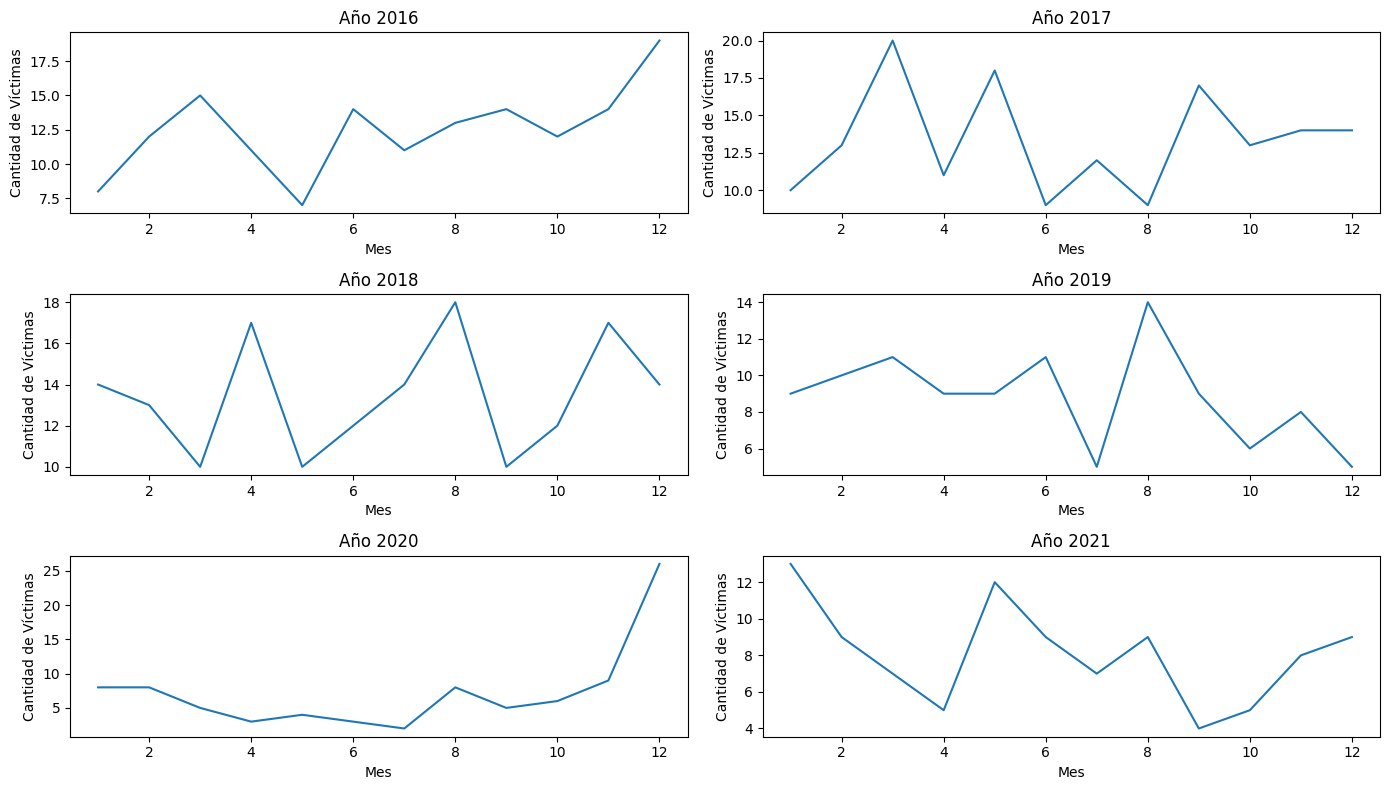

In [55]:
utils.accidentes_mensuales(df_homicidios)

De las gráficas anteriores, no se observa un patrón a lo largo del año comparando entre los distintos años. Los picos de accidentes fatales no se observan en los mismos meses en los distintos años registrados. Lo que se observa con claridad es la disminución notable de accidentes fatales desde Diciembre de 2019 hasta Noviembre de 2020, relacionado con las medidas de cuarentena por la pandemia COVID-19.

El mes con menor cantidad de víctimas tiene 51 víctimas
El mes con mayor cantidad de víctimas tiene 87 víctimas


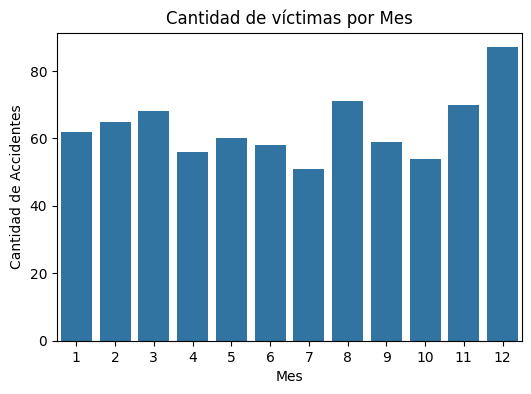

In [56]:
utils.cantidad_victimas_mensuales(df_homicidios)

Si se considera la distribución anual de todos los registros disponibles, se puede observar que el patrón que extiste a lo largo del año es un pico de accidentes en el mes de diciembre, siendo los meses con mas accidentes fatales Diciembre, Noviembre y Agosto. El mes con menos cantidad de accidentes fatales registrados es Julio y Septiembre.

## Distribución semanal
En este apartado se busca encontrar patrones en la cantidad de accidentes a lo largo de la semana.

El día de la semana con menor cantidad de víctimas tiene 101 víctimas
El día de la semana con mayor cantidad de víctimas tiene 117 víctimas
La diferencia porcentual es de 15.84


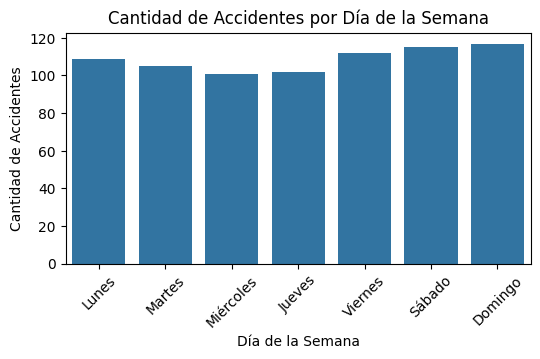

In [57]:
utils.cantidad_victimas_por_dia_semana(df_homicidios)

Considerando el total de los registros, la distribución de los accidentes tienden a registrarse entre los viernes a lunes, con el máximo regritrado el día Sábado y el mínimo el día Jueves. Sin embargo, la diferencia entre las cantidades mínima y máxima registrada en la semana es del 11.5% solamente.

## Distribución por momento del día
Para este análisis se creó una nueva columna donde se caracterizaran los diferentes momentos del día con el siguiente criterio:

- Mañana: de 6:00 a 10:59
- Medio día: de 11:00 a 13:59
- Tarde: de 14:00 a 18:59
- Noche: de 19:00 a 23:59
- Madrugada: de 24:00 a 05:59

A continuación, se observa la distribución de la cantidad de accidentes en cada una de estas categorías.

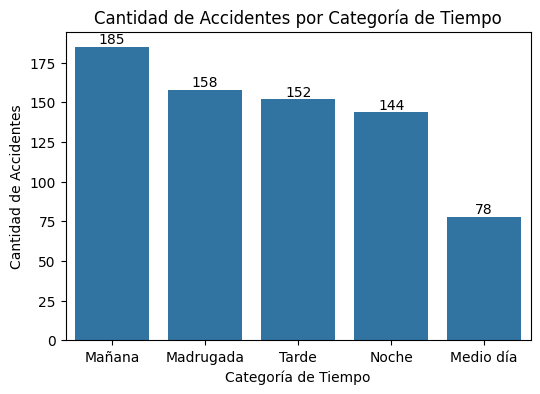

In [58]:
utils.cantidad_accidentes_por_categoria_tiempo(df_homicidios)

Se pueden apreciar que casi el 26% de los accidentes ocurren durante la mañana, donde la actividad laboral es alta. En el mediodía se registra un porcentaje considerablemente menor de cantidad de accidentes fatales respecto a los otros momentos del día.

Ahora, para mayor detalle, se observa la distribución horaria de los accidentes.

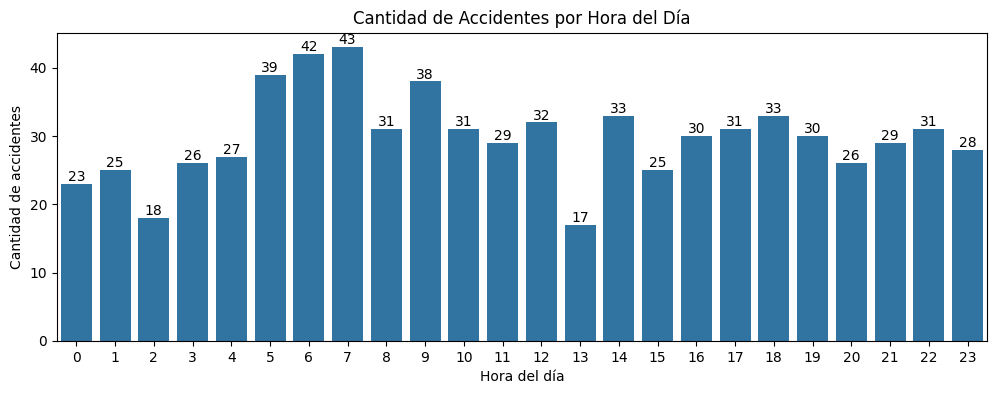

In [59]:
utils.cantidad_accidentes_por_horas_del_dia(df_homicidios)

Con mas detalle, observando hora a hora la distribución de los accidentes, es posible identificar el horario entre las 5 a las 8 de la mañana como el de mayor cantidad de accidentes. Luego se observa un poco a las 9 de la mañana seguido de tres momentos puntuales como lo son las 14 hs, las 18 hs y las 22 hs.

## Distribución días de la semana vs fines de semana
Lo que se busca en este punto es comparar la cantidad de accidentes en los días de semana (es decir, de lunes a viernes) y los fines de semana (sábado y domingo).

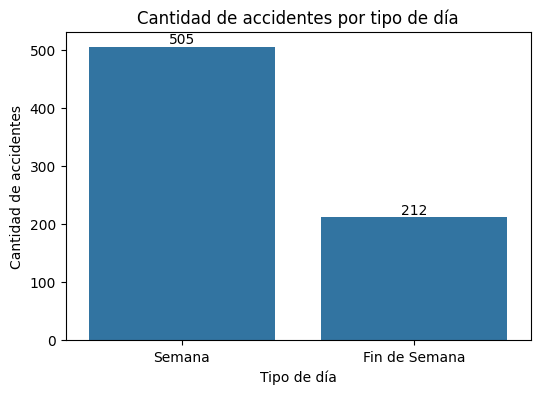

In [60]:
utils.cantidad_accidentes_semana_fin_de_semana(df_homicidios)

Del gráfico anterior se puede ver que la mayor cantidad de accidentes registrados fue durante la semana, siendo algo menos de la mitad los ocurridos el fin de semana. Esto contrasta con lo observado en el anterior análisis, donde se vieron las mayores cantidades entre el viernes y el lunes, aunque al acumular de lunes a viernes es una sola medida, es que los días de semana acumulan mas que los fines de semana.

## Edad de las víctimas
En este punto se busca entender el patrón de distribución de las edades de las víctimas. En los siguientes gráficos se muestra el histograma de edades uy un boxplot para entender su distribución de las mismas.

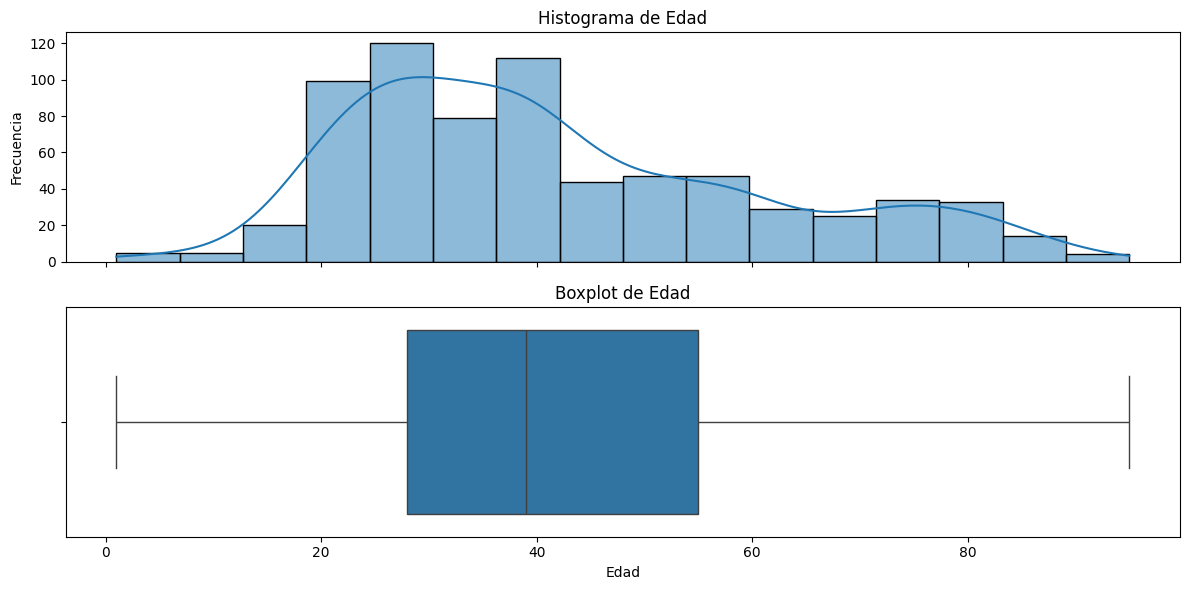

In [61]:
utils.distribucion_edad(df_homicidios)

Se puede apreciar en los gráficos anteriores, que el 75% de los accidentados es menor de 55 años, con una mediana de 39 años. No se observan edades atípicas. Si bien se observa un mínimo de 1 año y un máximo de 95 años, esto tiene que ver con el registro de todas las víctimas, no necesariamente son las que manejaban al momento del accidente. El histograma se observa con una distribución algo sesgada a la derecha, concentrando la mayor cantidad de accidentes entre los 20 a 40 años.

Se puede ver en detalle la distribución de las edades por año.

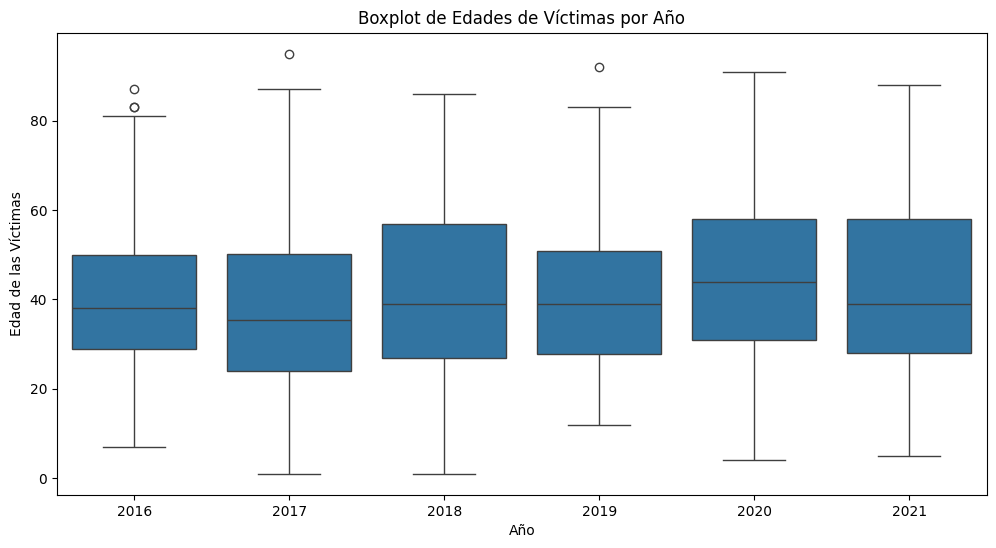

In [62]:
utils.distribucion_edad_por_anio(df_homicidios)

Las distribuciones de las edades se comportan muy parecido en los años registrados, con una mediana alrededor de los 40 años. Se observan algunos valores atípicos que tienen que ver con aultos mayores víctimas de los accidentes en los años 2016, 2017 y 2019.

Una relación interesante a ver es la variación entre los grupos de Masculinos y Femeninos según la edad.

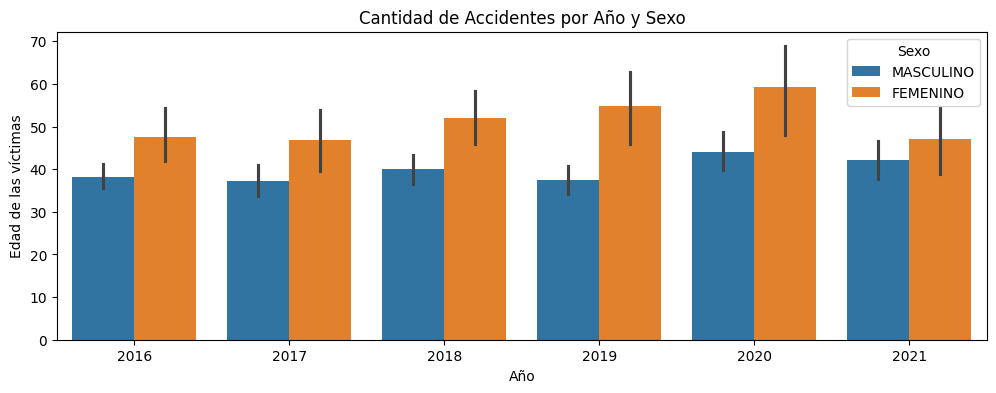

In [63]:
utils.cantidades_accidentes_por_anio_y_sexo(df_homicidios)

In [64]:
# Se observan los datos numéricos de ese gráfico
resumen_sexo_año = df_homicidios.groupby(['Año', 'Sexo']).size().reset_index(name='Cantidad accidentes')
resumen_sexo_año

,Año,Sexo,Cantidad accidentes
0,2016,FEMENINO,27
1,2016,MASCULINO,119
2,2017,FEMENINO,36
3,2017,MASCULINO,104
4,2018,FEMENINO,38
5,2018,MASCULINO,111
6,2019,FEMENINO,27
7,2019,MASCULINO,77
8,2020,FEMENINO,16
9,2020,MASCULINO,65


En el gráfico anterior se puede ver que hasta el 2020 había una tendencia creciente en las edades de las mujeres fallecidas que en hombres, con edades entre los 40 y 50 años, disminuyendo para 2021. En cuanto a los hombres, se observa una leve tendencia al aumento de la edad de fallecimientos pero sostenida alrededor de los 40 años de edad, pero igualmente menor edad que en mujeres.

Para analizar más concretamente la magnitud de la diferencia de estos dos grupos se decide utilizar el *estadístico de Cohen*, que es una medida utilizada en estadísticas que se utiliza comúnmente en el contexto de pruebas de hipótesis y comparación de grupos para determinar si una diferencia observada es significativa desde un punto de vista práctico. Se le denomina "d" y se calcula como:

$$d = \frac{Diferencia\ entre\ las\ medias\ de\ los\ grupos\ o\ condiciones}{Desviación\ estándar\ combinada\ de\ los \ grupos \ o \ condiciones}$$

Donde:
* Diferencia entre las medias de los grupos o condiciones es la media del grupo 1 menos la media del grupo 2.
* Desviación estándar combinada de los grupos o condiciones es la varianza combinada dos grupos.

El valor resultante \(d\) indica cuántas desviaciones estándar se encuentra la diferencia observada con respecto a la variabilidadde los datos. Un valor mayor

A continuación, se calcula el estadístico para todo el conjunto datos, para conocer la diferencia entre dos grupos sexo y edades.

In [65]:
# Se definen los grupos
grupo1_completo = df_homicidios[df_homicidios['Sexo'] == 'MASCULINO']['Edad']
grupo2_completo = df_homicidios[df_homicidios['Sexo'] == 'FEMENINO']['Edad']
# Se calcula el Cohen
d = utils.cohen(grupo1_completo, grupo2_completo)
print(f'El valor de Cohen es: {round(d,2)}')

El valor de Cohen es: -0.61


Se presenta un valor de Cohen de -0.61 entre los dos grupos analizados, esto implica un efecto de tamaño moderado alto. Esto significa que hay una diferencia marcada en la edad promedio entre estos grupos con dirección hacia las mujeres, es decir, que en promedio el grupo hombres tiende a ser más joven en comparación con el grupo de mujeres, que es lo que se intuía desde el anterior gráfico.

Otra forma interesante de ver esto mismo es a lo largo de los años.

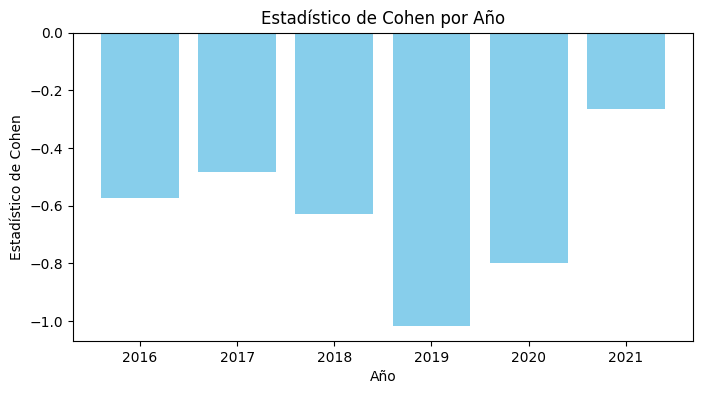

In [66]:
utils.cohen_por_año(df_homicidios)

A lo largo de los años, la relación negativa se mantiene, es decir, indican una consistente tendencia a lo largo de los años en la que, en promedio, el grupo de hombres tiende a ser más joven que el grupo de mujeres en términos de edades. La magnitud del efecto, medida por el valor de Cohen, varía de un año a otro. En 2019, el valor de Cohen es el más negativo, -1.02, lo que sugiere que la diferencia en edades entre hombres y mujeres es más pronunciada en ese año. Por otro lado, en 2021, el valor de Cohen es el menos negativo, -0.26, lo que indica una diferencia más pequeña en edades entre los dos grupos en ese año.

Continuando con el análisis de las edades, resulta interesante analizar cómo se distribuyen las edades para la condición de la victima, es decir el 'rol' en el hecho.

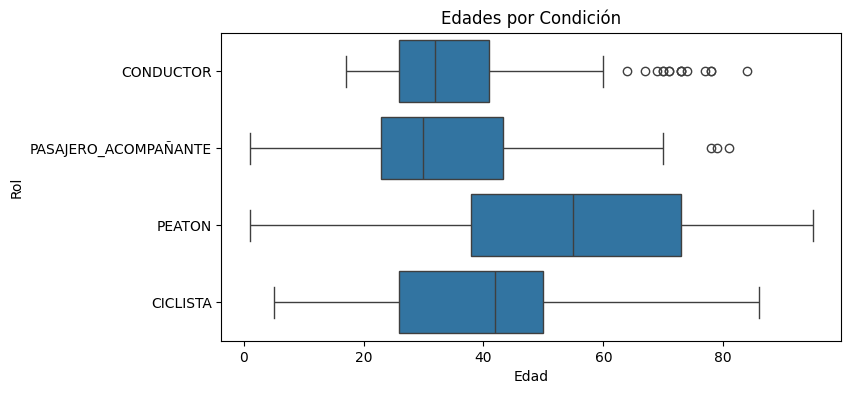

In [67]:
utils.edad_y_rol_victimas(df_homicidios)

De las edades promedio que se obeservan en los cuatro roles analizados, se encuentra que es similar la edad del conductor de auto y del pasajero acompañante, siendo de alrededor de los 35 años. Se observa que la edad mínima del conductor es de alrededor de los 18 años, pero en los demás roles es posible encontrar victimas de menor edad, lo que se se relaciona con ser niños que estan siendo trasladados.

En el caso de los peatones se observa mayor dispersión de las edades, desde niños muy pequeños a adultos mayores de cerca de los 90 años.

Si bien en conductor y pasajero acompañante se observan algunos valores atípicos, los mismos son edades esperables y se consideran casos especiales en el conjunto de datos.

Finalmente, se analiza la relación de la edad con los distintos vehículos que ocupaba la victima o si era peatón.

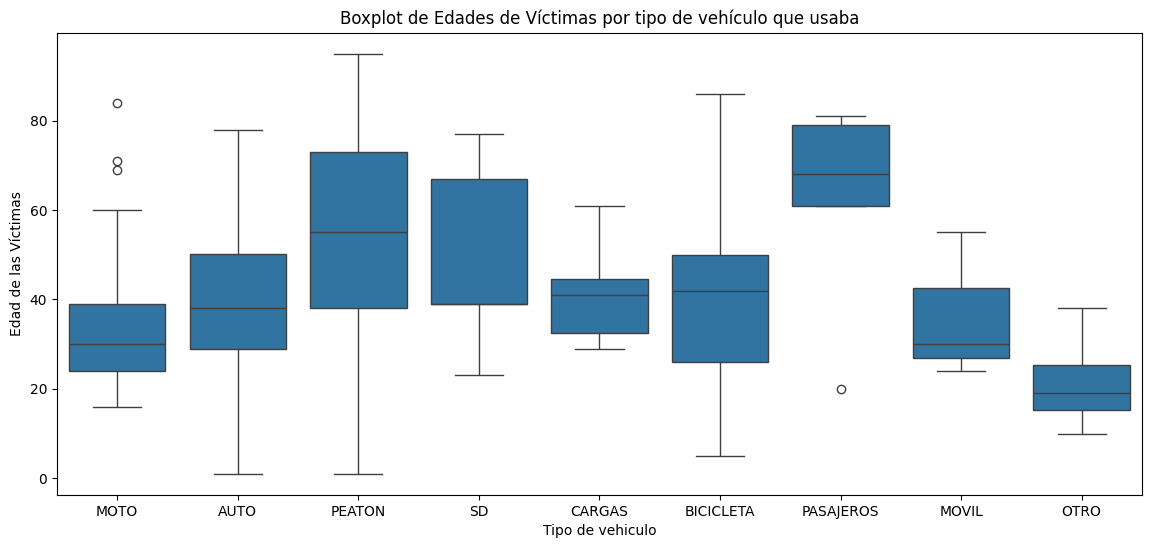

In [68]:
utils.distribucion_edad_por_victima(df_homicidios)

Se observa una gran dispersión de edades de víctimas fallecidas según el vehículo que ocupaban al momento del hecho. En el caso de victimas peatones es donde se observa un rango mas amplio de edades que en las demás categorías. Las victimas de mayor edad se observan mas concentradas cuando son pasajeros y victimas mas joven se observan en moto y otros.

## Sexo de las víctimas
Si bien ya se analizaron algunos puntos de sexo en relación con la edad, en este apartado se intenta analizar la relación del sexo con las cantidades de accidente, los roles y el tipo de vehículo que ocupaba o si era peatón.

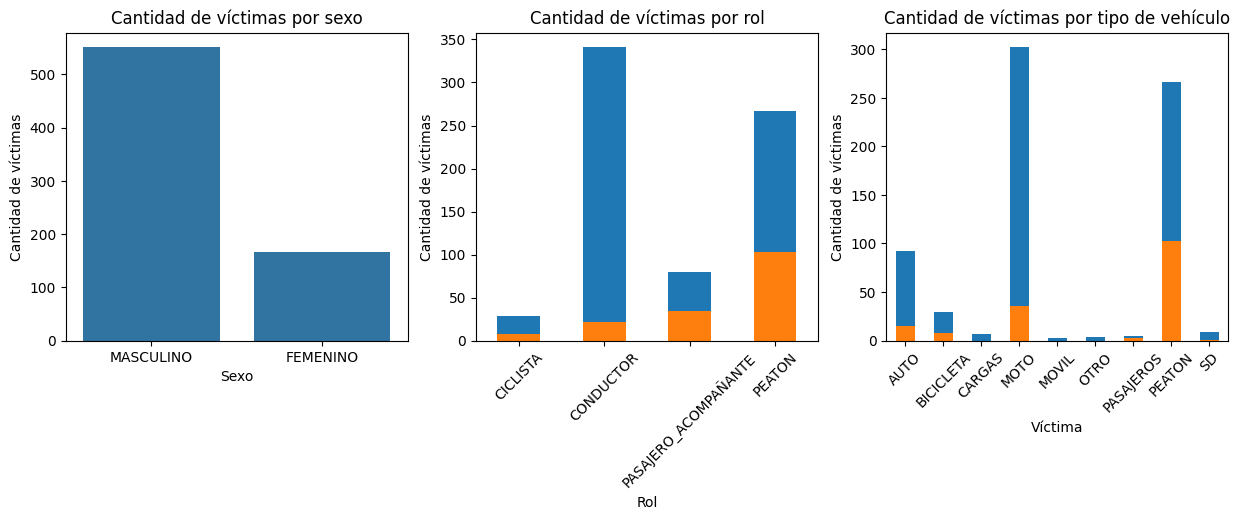

In [69]:
utils.cantidad_victimas_sexo_rol_victima(df_homicidios)

Se puede ver la diferencia en la cantidad de víctimas masculina por sobre las femeninas. Se aprecia la diferencia sobre todo en Conductor, donde la mayor proporción son masculinos y lo que llama la atención es que Motos es el vehículo con mayor proporción de accidentes con una alta proporción de masculinos. Los peatones también son las víctimas con mayor cantidad de fallecimientos en accidentes, con mayor proporción de masculinos, pero menos pronunciada la diferencia.

## Participantes en los accidentes
En este punto se analizan las cantidades de víctimas en función de los vehículos o medios de transporte que participaron de hecho.

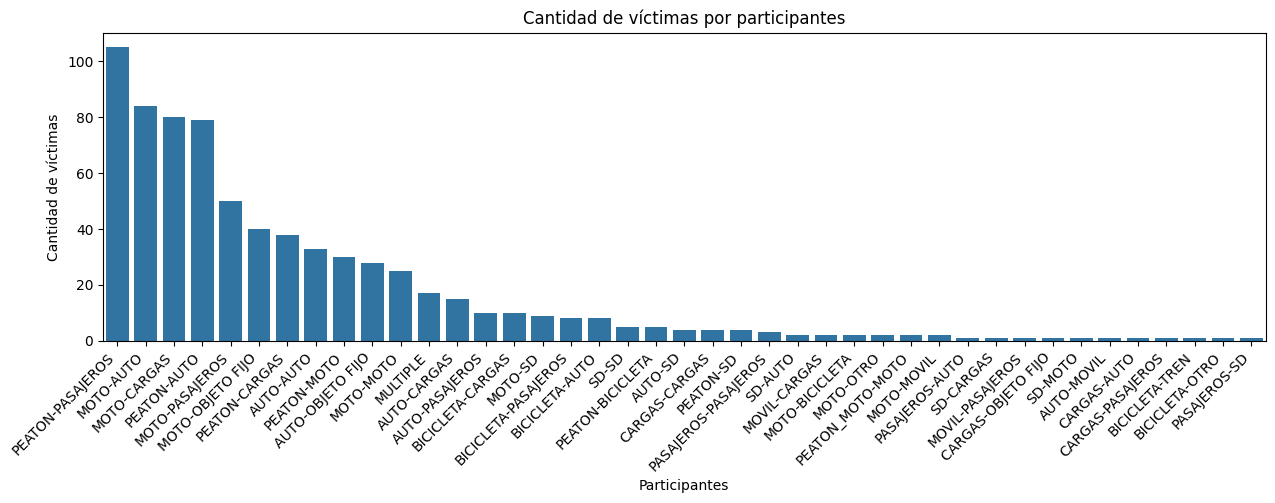

In [70]:
utils.cantidad_victimas_participantes(df_homicidios)

Resulta llamativo que la mayor cantidad de víctimas ocurren por hechos donde se involucran peatones con pasajeros. Según el diccionario de datos, Peatón es cualquier víctima distinta de cualquier ocupante de un vehículo, ya sea un conductor/a o un pasajero/a y Pasajero es cualquier personas lesionadas que se encuentran dentro, descendiendo o ascendiendo de las unidades de autotrasporte público de pasajeros/as y ómnibus de larga distancia. Para tratar de encontrar un sentido a este punto, se observan los casos de estos registros.

In [71]:
df_homicidios[df_homicidios['Participantes'] == 'PEATON-PASAJEROS'][['Participantes', 'Víctima', 'Acusado']]

,Participantes,Víctima,Acusado
13,PEATON-PASAJEROS,PEATON,PASAJEROS
21,PEATON-PASAJEROS,PEATON,PASAJEROS
23,PEATON-PASAJEROS,PEATON,PASAJEROS
27,PEATON-PASAJEROS,PEATON,PASAJEROS
34,PEATON-PASAJEROS,PEATON,PASAJEROS
...,...,...,...
679,PEATON-PASAJEROS,PEATON,PASAJEROS
684,PEATON-PASAJEROS,PEATON,PASAJEROS
685,PEATON-PASAJEROS,PEATON,PASAJEROS
706,PEATON-PASAJEROS,PEATON,PASAJEROS


Lo que se interpreta de ver los datos asociados al registro de Participante como Peaton-Pasajero, es que si la víctima es Peatón y el acusado es Pasajero, se debe estar refiriendo que el hecho ocurrió asociado a una persona que subía, bajaba o se trasladaba por algún medio de transporte público. A partir de aquí se considerará de esta manera, pero teniendo en cuenta esta observación hasta confirmar o rechazar por parte de los interesados.

Por otra parte, en el gráfico anterior, se llega a apreciar que los hechos que involucran moto, auto y cargas son los que mayor cantidad de víctimas acumulan.

## Acusados en los accidentes

In [72]:
df_homicidios.head(2)

,Id,Rol,Sexo,Edad,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,...,Pos y,Participantes,Víctima,Acusado,Día semana,Nombre día,Categoria tiempo,Hora del día,Dia semana,Tipo de día
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,04:00:00,...,-34.68757022,MOTO-AUTO,MOTO,AUTO,4,Viernes,Madrugada,4,4,Semana
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,01:15:00,...,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,5,Sábado,Madrugada,1,5,Fin de Semana


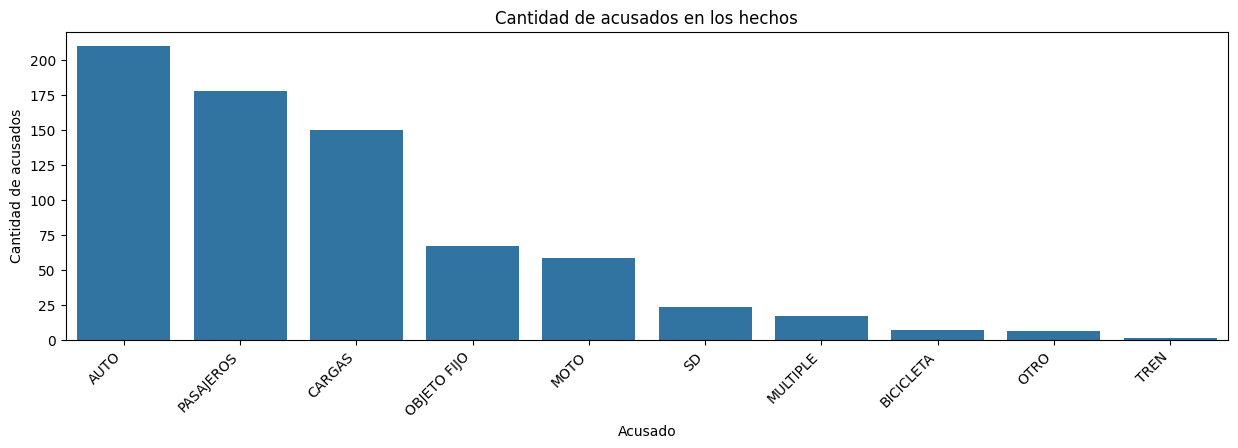

In [73]:
utils.cantidad_acusados(df_homicidios)

Lo que se interpreta de este gráfico es que la mayor responsabilidad en los hechos registrados es de los conductores de autos, seguidas de pasajeros y cargas (éste último se refiere a vehículos de carga). En cuanto a Pasajeros tiene sentido en relación con lo interpretado en el punto anterior, donde el vehículo involucrado es el transporte público, lo que da sentido a lo discutido.

## Tipo de calle donde ocurren los hechos
En este apartado lo que se busca en encontrar patrones en relación del tipo de calle donde ocurren los hechos y si son cruces de calles o no.

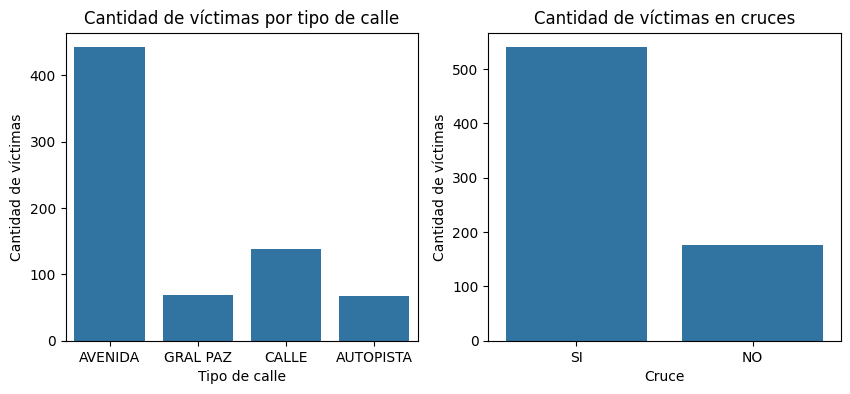

In [74]:
utils.accidentes_tipo_de_calle(df_homicidios)

Se pueden ver que la mayor cantidad de hechos con víctimas fatales ocurren en las avenidas y en particular en los cruces de calles.

## Carga del dataframe

In [75]:
archivo_limpio = '../Datasets/homicidios_limpio.csv'
df_homicidios.to_csv(archivo_limpio, index=False, encoding='utf-8')
print(f'Se guardó el archivo {archivo_limpio}')

Se guardó el archivo ../Datasets/homicidios_limpio.csv
